In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## Unbalanced Data

In [2]:
# #Select feature to predict on

# feature = 'average_rating_count'
# data_1_2_3 = 2

In [3]:
#Select feature to predict on

feature = 'average_rating_count'
data_1_2_3 = 2

In [4]:
#Choosing file path



if data_1_2_3 ==1:
    file_location = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Datasets\\Directors\\1_Director_Data_Mar-21-2020.csv'
elif data_1_2_3 == 2:
    file_location = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Datasets\\Directors\\2_Director_Data_Enhanced_May-10-2020.csv'
#     file_location = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Datasets\\Movies\\2_Movies_WithAwards.csv'

elif data_1_2_3 == 3:
    file_location = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Datasets\\Directors\\3_USA_Director_Specific_dataset_May-15-2020.csv'
else:
    raise ValueError('Wrong INTEGER provided.') 
    
data = pd.read_csv(file_location)

data.shape

(1651, 64)

In [5]:
file_location

'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\Datasets\\Directors\\2_Director_Data_Enhanced_May-10-2020.csv'

In [6]:
data.head(5)

,director_ids,director_name,average_rating_value,average_rating_count,movies_produced,career_Length,CareerStartYear,Gender,birthYear,median_inter_event_time,...,total_genre_Western,director_profession_primary,director_profession_secondary,director_profession_tertiary,director_known_titles_count,director_known_titles_average_rating_value,average_movie_per_year,num_countries_screened,num_genres_directed,num_languages_released
0,nm0000040,Stanley Kubrick,7.30,231646.00,1,49,1951,Male,1928,0.0,...,0,1,0,0,8,8.00,0.02,1,3,1
1,nm0000041,Akira Kurosawa,8.13,106058.00,3,53,1941,Female,1910,19.5,...,0,0,1,0,4,8.20,0.06,2,3,2
2,nm0000095,Woody Allen,6.86,63387.94,17,51,1966,Male,1935,1.0,...,0,0,1,0,4,7.88,0.33,1,7,5
3,nm0000104,Antonio Banderas,6.30,5964.00,1,1,1999,Male,1960,0.0,...,0,0,0,0,4,6.82,1.00,1,3,1
4,nm0000106,Drew Barrymore,6.90,56419.00,1,6,2004,Male,1975,0.0,...,0,0,0,0,8,6.32,0.17,1,2,1


In [7]:
data.loc[751].values

array(['nm0386246', 'Rajkumar Hirani', 8.4, 218315.0, 1, 7, 2003, 'Male',
       1962, 0.0, 0.0, 385, 50, 67, 67.0, 0.0, 0.0, 6523137.0,
       550000000.0, 0, 0, 0, 0, 1, 0, 170.0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       8, 8.27, 0.14, 1, 2, 2], dtype=object)

In [8]:
### Coold code

# # Quartile cut into 4 different buckets

# cutIntoQuartiles = pd.qcut(data['rating_value'].to_list(), q=4)

# # # Print the quartile range for visuals
# # print(cutIntoQuartiles.categories)

# # # Rename the categories to poor , average,  good , excellent
# # cutIntoQuartiles.categories = ['poor','average','good','excellent']

# # # Add the data to the dataframe
# # movies_data['calc_score'] = cutIntoQuartiles

In [9]:
def quantile_feature(data, string):
    q1 = data[string].quantile(.25)
    q2 = data[string].quantile(.50)
    q3 = data[string].quantile(.75)
    q4 =  data[string].quantile(1)
    
    
#     q1 = (data.loc[:,string].quantile(.25))
#     q2 = (data.loc[:,string].quantile(.50))
#     q3 = (data.loc[:,string].quantile(.75))
#     q4 = (data.loc[:,string].quantile(1))
    return q1, q2, q3, q4


def success_measure_chained(score):
    
    if score >= 0 and score <= q1:
        return 'Terrible'
    elif score >q1 and score <=q2:
        return 'Poor'
    elif score >q2 and score <= q3:
        return 'Average'
    elif score > q3 and score <=q4:
        return 'Excellent'
    else:
        return 'Error_Score' 
    
    
def create_Movie_class(df,feature_name):
    feature = feature_name
#     q1,q2,q3,q4 = quantile_feature(df,feature_name)
    df['Movie_class'] = df[feature].apply(success_measure_chained)
    
    return df

In [10]:
def dummy_male(string):
    if string =='Male':
        return 1
    else:
        return 0
    
    
    
def dummy_female(string):
    if string =='Female':
        return 1
    else:
        return 0
    

    

In [11]:
#If 1 ---- MovieDataset 1
if data_1_2_3 == 1:
     data = data.drop(columns=['director_ids', 'director_name','primaryProfession', 'knownForTitles'])
    
elif data_1_2_3 == 2 or data_1_2_3 ==3:
    data = data.drop(columns=['director_ids', 'director_name'])

    
# data.drop(columns=['director_ids', 'director_names','movie_id','title','primaryProfession', 'knownForTitles','date_published', 'release_date'],inplace=True)
# data = data.drop(columns=['director_ids', 'director_names', 'movie_id', 'title',
#        'release_date', 'Film', 'Name'])

In [12]:
# feature = 'rating_value'
q1,q2,q3,q4 = quantile_feature(data,feature)
data = create_Movie_class(data,feature)

        
# data['Gender_MALE'] = data.Gender.apply(dummy_male)
# data['Gender_FEMALE'] = data.Gender.apply(dummy_female)




In [13]:
data['Movie_class'].value_counts()

Terrible     414
Excellent    413
Poor         412
Average      412
Name: Movie_class, dtype: int64

In [14]:
# data.review_count_user = data.review_count_user.astype(int)
# data.review_count_critic = data.review_count_critic.astype(int)
# data.rating_value = data.rating_value.astype(float)
# data.rating_count = data.rating_count.astype(int)
# data.movie_year = data.movie_year.astype(int)
# data.birthYear = data.birthYear.astype(int)


# if data_1_2_3 == 2 or data_1_2_3 ==3:
#     data.metascore = data.metascore.astype(int)

In [15]:
data.Gender = data.Gender.map({'Male': 1, 'Female':0})
data.drop(columns=[feature],inplace=True)

In [16]:
# data.drop(columns=[feature,'Gender'],inplace=True)

In [17]:
# for i in data.columns.values:
#     print(i)

In [18]:
data.columns

Index(['average_rating_value', 'movies_produced', 'career_Length',
       'CareerStartYear', 'Gender', 'birthYear', 'median_inter_event_time',
       'average_inter_event_time', 'total_review_count_user',
       'total_review_count_critic', 'total_metascore', 'median_metascore',
       'total_awards_won', 'total_awards_nominated', 'total_gross_value',
       'total_budget_value', 'budget_cur_AUD', 'budget_cur_CAD',
       'budget_cur_EUR', 'budget_cur_GBP', 'budget_cur_INR', 'budget_cur_USD',
       'average_runtime_of_movie', 'total_genre_Action', 'total_genre_Adult',
       'total_genre_Adventure', 'total_genre_Animation',
       'total_genre_Biography', 'total_genre_Comedy', 'total_genre_Crime',
       'total_genre_Documentary', 'total_genre_Drama', 'total_genre_Family',
       'total_genre_Fantasy', 'total_genre_Film_Noir', 'total_genre_Game_Show',
       'total_genre_History', 'total_genre_Horror', 'total_genre_Music',
       'total_genre_Musical', 'total_genre_Mystery', 'total_ge

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from string import ascii_uppercase
import seaborn as sn

def report_accuracy_RF(dataframe, predicted_feature, numberEstimators=100):
    #Splitting X and y
    X = dataframe[dataframe.columns.difference([predicted_feature],sort=False)]
    y = dataframe[predicted_feature]
    
    #Initialize Random Forest
    rnd_forest = RandomForestClassifier(n_estimators=numberEstimators, class_weight='balanced',random_state = 42)

#     rnd_forest = RandomForestClassifier(n_estimators=numberEstimators, class_weight='balanced', oob_score=True)
#     rnd_forest = RandomForestClassifier(n_estimators=numberEstimators, oob_score=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    rnd_forest.fit(X_train,y_train.values.ravel())
    score = rnd_forest.score(X_test,y_test)
    
    return score, rnd_forest,X, y ,X_train, X_test, y_train, y_test
    

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('ConfusionMatrix_RF_EntireDirector.png', dpi=100, bbox_inches='tight')


In [21]:
def create_cnf_matrix(y_test, X_test, model):
    
    y_true = y_test.copy()
    y_predict = model.predict(X_test)
    
### C_0_0 = TP - male being classified as a male
### C_0_1 = Males being identified as femals
### C_1_0 = Female being identified as male
### C_1_1 = TN female identified as female  

    #define the order of classes appearing in the matrix
    labels = ['Terrible','Poor','Average','Excellent']
    cnf_matrix = confusion_matrix(y_true, y_predict,  labels=labels)
    
    return cnf_matrix
    

In [22]:
def calculate_confusion_matrix_metrics(confusion_matrix):
    #source:
    #https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py
    
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    
    return TN, FP, FN, TP

In [23]:
def print_accuracy_feature_importance(score, X, model):
    
    print(f'The accuracy of the model is equal to {round(score * 100,2)} %')
    print()
    print(X.columns)
    print()
    print(model.feature_importances_)
    

In [24]:
def customized_classification_report(y_true,y_pred, AUCROC ):
    cols_to_use_classification_report = ['Terrible','Poor','Average','Excellent','accuracy']
    reportGBClassification = classification_report(y_true,
                                                   y_pred,
                                                   labels = cols_to_use_classification_report[:-1],
                                                   output_dict=True)
    
    reportDF = pd.DataFrame(reportGBClassification, columns = cols_to_use_classification_report)[0:3]#.round(2)
    
    accuracyRow = reportDF['accuracy'].unique().tolist()
    
    reportDF.drop(columns='accuracy',inplace= True)

    reportDF.loc[len(reportDF)] = 4 * accuracyRow
    reportDF.loc[len(reportDF)] = 4 * [AUCROC]  #[round(AUCROC,2)]

    reportDF = reportDF.rename(index = {3:'accuracy',4:'AUC ROC'})
    return reportDF

In [25]:
score, rnd_forest,X, y ,X_train, X_test, y_train, y_test = report_accuracy_RF(data,"Movie_class")
print_accuracy_feature_importance(score,X, rnd_forest)
# print("===============================================\n")
# print()
# cnf_matrix = create_cnf_matrix(y_test,X_test,rnd_forest)
# print(cnf_matrix)
# print("===============================================\n")
# TN, FP, FN, TP = calculate_confusion_matrix_metrics(cnf_matrix)
# print('TN = ',TN)
# print('FP = ',FP)
# print('FN = ',FN)
# print('TP = ',TP)

The accuracy of the model is equal to 72.21 %

Index(['average_rating_value', 'movies_produced', 'career_Length',
       'CareerStartYear', 'Gender', 'birthYear', 'median_inter_event_time',
       'average_inter_event_time', 'total_review_count_user',
       'total_review_count_critic', 'total_metascore', 'median_metascore',
       'total_awards_won', 'total_awards_nominated', 'total_gross_value',
       'total_budget_value', 'budget_cur_AUD', 'budget_cur_CAD',
       'budget_cur_EUR', 'budget_cur_GBP', 'budget_cur_INR', 'budget_cur_USD',
       'average_runtime_of_movie', 'total_genre_Action', 'total_genre_Adult',
       'total_genre_Adventure', 'total_genre_Animation',
       'total_genre_Biography', 'total_genre_Comedy', 'total_genre_Crime',
       'total_genre_Documentary', 'total_genre_Drama', 'total_genre_Family',
       'total_genre_Fantasy', 'total_genre_Film_Noir', 'total_genre_Game_Show',
       'total_genre_History', 'total_genre_Horror', 'total_genre_Music',
       'total_g

In [26]:
feature_names  = X.columns

In [27]:
feature_names

Index(['average_rating_value', 'movies_produced', 'career_Length',
       'CareerStartYear', 'Gender', 'birthYear', 'median_inter_event_time',
       'average_inter_event_time', 'total_review_count_user',
       'total_review_count_critic', 'total_metascore', 'median_metascore',
       'total_awards_won', 'total_awards_nominated', 'total_gross_value',
       'total_budget_value', 'budget_cur_AUD', 'budget_cur_CAD',
       'budget_cur_EUR', 'budget_cur_GBP', 'budget_cur_INR', 'budget_cur_USD',
       'average_runtime_of_movie', 'total_genre_Action', 'total_genre_Adult',
       'total_genre_Adventure', 'total_genre_Animation',
       'total_genre_Biography', 'total_genre_Comedy', 'total_genre_Crime',
       'total_genre_Documentary', 'total_genre_Drama', 'total_genre_Family',
       'total_genre_Fantasy', 'total_genre_Film_Noir', 'total_genre_Game_Show',
       'total_genre_History', 'total_genre_Horror', 'total_genre_Music',
       'total_genre_Musical', 'total_genre_Mystery', 'total_ge

Confusion matrix, without normalization
[[71 12  0  0]
 [15 46 20  1]
 [ 1 12 56 14]
 [ 0  2 15 66]]


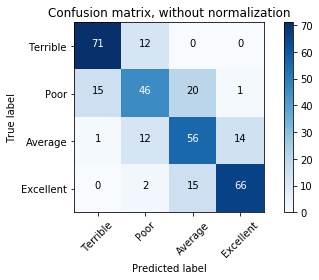

In [28]:
y_predict= rnd_forest.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_predict,labels=['Terrible','Poor','Average','Excellent'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Terrible','Poor','Average','Excellent'],
                      title='Confusion matrix, without normalization')

In [29]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_predict,labels=['Terrible','Poor','Average','Excellent']))

              precision    recall  f1-score   support

    Terrible       0.82      0.86      0.84        83
        Poor       0.64      0.56      0.60        82
     Average       0.62      0.67      0.64        83
   Excellent       0.81      0.80      0.80        83

    accuracy                           0.72       331
   macro avg       0.72      0.72      0.72       331
weighted avg       0.72      0.72      0.72       331



In [30]:
X_test.loc[751]

average_rating_value                             8.40
movies_produced                                  1.00
career_Length                                    7.00
CareerStartYear                               2003.00
Gender                                           1.00
                                               ...   
director_known_titles_average_rating_value       8.27
average_movie_per_year                           0.14
num_countries_screened                           1.00
num_genres_directed                              2.00
num_languages_released                           2.00
Name: 751, Length: 61, dtype: float64

In [31]:
Find_Row_X_test = X_test.copy()
df_actual = pd.DataFrame(Find_Row_X_test)
df_actual["actual"] = y_test
df_actual["predicted"] = y_predict

incorrect = df_actual[df_actual["actual"] != df_actual["predicted"]]

In [32]:
Find_Row_X_test = Find_Row_X_test.reset_index()

In [33]:
Find_Row_X_test[Find_Row_X_test['index'] == 751]

,index,average_rating_value,movies_produced,career_Length,CareerStartYear,Gender,birthYear,median_inter_event_time,average_inter_event_time,total_review_count_user,...,director_profession_secondary,director_profession_tertiary,director_known_titles_count,director_known_titles_average_rating_value,average_movie_per_year,num_countries_screened,num_genres_directed,num_languages_released,actual,predicted
283,751,8.4,1,7,2003,1,1962,0.0,0.0,385,...,0,1,8,8.27,0.14,1,2,2,Excellent,Poor


In [34]:
incorrect[incorrect['actual']=='Excellent']

,average_rating_value,movies_produced,career_Length,CareerStartYear,Gender,birthYear,median_inter_event_time,average_inter_event_time,total_review_count_user,total_review_count_critic,...,director_profession_secondary,director_profession_tertiary,director_known_titles_count,director_known_titles_average_rating_value,average_movie_per_year,num_countries_screened,num_genres_directed,num_languages_released,actual,predicted
1022,6.40,1,14,1999,1,1969,0.0,0.0,274,244,...,1,0,8,6.48,0.07,1,3,2,Excellent,Average
1015,6.30,1,29,1979,0,1953,0.0,0.0,350,215,...,0,0,3,7.07,0.03,1,4,1,Excellent,Average
345,6.50,2,40,1970,1,1974,0.0,0.0,491,385,...,0,0,3,6.70,0.05,2,5,3,Excellent,Average
840,6.80,1,10,2005,0,1969,0.0,0.0,562,462,...,1,0,6,7.30,0.10,1,2,1,Excellent,Average
697,6.03,3,15,2000,1,1972,6.5,6.5,795,328,...,0,0,4,6.45,0.20,1,4,1,Excellent,Average
891,6.13,3,14,1992,1,1961,2.5,2.5,820,276,...,0,0,8,5.98,0.21,1,6,4,Excellent,Average
837,7.80,1,14,2000,1,1960,0.0,0.0,261,404,...,0,1,4,7.28,0.07,1,2,2,Excellent,Average
984,6.90,1,13,1970,1,1944,0.0,0.0,340,164,...,0,1,4,7.95,0.08,1,2,1,Excellent,Average
377,7.50,1,1,1998,1,1967,0.0,0.0,226,143,...,1,0,8,7.35,1.00,1,6,2,Excellent,Average
631,6.20,2,16,1996,1,1967,4.0,4.0,788,392,...,1,0,4,6.68,0.12,2,5,2,Excellent,Average


In [35]:
from sklearn.metrics import roc_auc_score


y_prob = rnd_forest.predict_proba(X_test)
ovo_macro_roc_auc = roc_auc_score(y_test, y_prob, average="macro", multi_class = "ovo")
print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(ovo_macro_roc_auc,3))


Area Under the Curve - ROC (OVO , Macro) :  0.93


In [36]:
rnd_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
customized_classification_report(y_test,y_predict, ovo_macro_roc_auc )

,Terrible,Poor,Average,Excellent
precision,0.816092,0.638889,0.615385,0.814815
recall,0.855422,0.560976,0.674699,0.795181
f1-score,0.835294,0.597403,0.643678,0.804878
accuracy,0.722054,0.722054,0.722054,0.722054
AUC ROC,0.930409,0.930409,0.930409,0.930409


In [38]:
data.shape

(1651, 62)

## SHAP

In [39]:
import shap
shap.initjs()


# explainer = shap.TreeExplainer(rnd_fores)
explainer = shap.TreeExplainer(rnd_forest)
shap_values = explainer.shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [40]:
X_test.shape

(331, 61)

In [41]:
shap_values[1][0,:]

array([-3.04e-03,  1.64e-02,  4.44e-03,  7.48e-04,  3.26e-04,  8.41e-03,
        1.60e-02,  9.53e-03,  1.24e-01,  8.34e-02,  3.67e-02,  3.36e-03,
        1.33e-04, -9.07e-05,  1.39e-01,  3.96e-02, -2.15e-05,  7.23e-05,
        2.83e-05, -1.98e-05,  3.51e-06,  8.89e-04, -2.66e-02,  1.84e-03,
        0.00e+00,  8.70e-03, -2.49e-03,  2.32e-03, -4.54e-04,  1.14e-03,
        3.41e-04,  8.57e-03,  1.43e-03,  1.85e-02,  0.00e+00,  0.00e+00,
        2.09e-04, -3.58e-03, -3.75e-03,  7.14e-04,  6.39e-03,  6.80e-06,
        0.00e+00,  0.00e+00, -1.54e-02, -4.26e-03,  0.00e+00, -2.51e-04,
        0.00e+00,  2.02e-03,  8.09e-04,  1.34e-04,  3.37e-04,  5.64e-04,
       -3.18e-04,  3.82e-03, -2.51e-03,  4.15e-03, -2.47e-04,  2.24e-02,
        5.78e-03])

In [42]:
explainer.expected_value

array([0.25, 0.25, 0.25, 0.25])

In [43]:
rnd_forest.classes_

array(['Average', 'Excellent', 'Poor', 'Terrible'], dtype=object)

In [44]:
shap_values[0].shape, y_test.shape, X_test.shape

((331, 61), (331,), (331, 61))

In [45]:
shap_values[0].shape,shap_values[1].shape,shap_values[2].shape,shap_values[3].shape

((331, 61), (331, 61), (331, 61), (331, 61))

In [46]:
y_test

1327      Average
46        Average
1480      Average
976      Terrible
661          Poor
          ...    
243          Poor
1236         Poor
1080      Average
48           Poor
686     Excellent
Name: Movie_class, Length: 331, dtype: object

In [47]:
rnd_forest.classes_

array(['Average', 'Excellent', 'Poor', 'Terrible'], dtype=object)

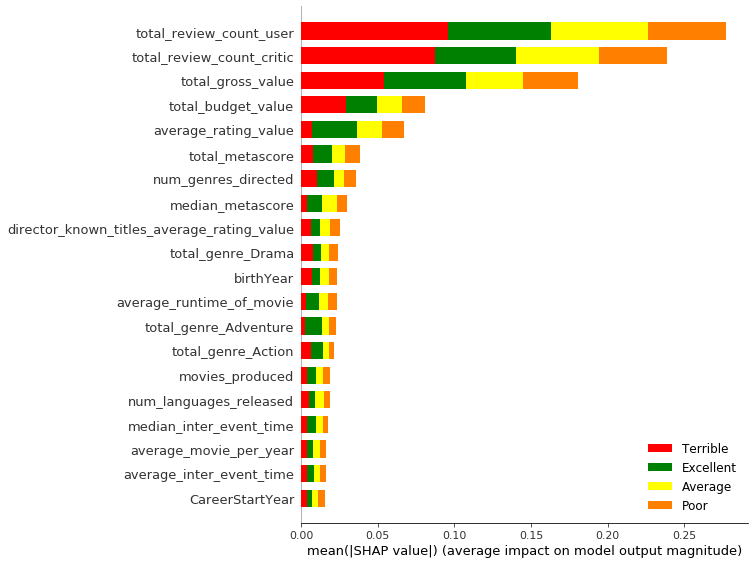

In [48]:
from matplotlib import colors as plt_colors
classes = rnd_forest.classes_

# set RGB tuple per class
colors = [(1, 1, 0), (0, 0.5, 0), (1, 0.5, 0),(1,0,0)]

# get class ordering from shap values
class_inds = np.argsort([-np.abs(shap_values[i]).mean() for i in range(len(shap_values))])

# create listed colormap
cmap = plt_colors.ListedColormap(np.array(colors)[class_inds])

shap.initjs()


# shap.summary_plot(shap_values, X,show=False)
shap.summary_plot(shap_values, 
                  features = X ,
                  class_names= rnd_forest.classes_ ,
                  title = 'Summary Plot for Random forest',
                  color=cmap,
                  show = False
#                   color = ['red','blue','green','yellow'],
                  )

# plt.savefig("EntireDirector_Global_Feature_Importance.png",bbox_inches = 'tight')
plt.show()

### New plot to bin the distribution

In [49]:
# Shap feature order
feature_order = np.argsort(np.sum(np.mean(np.abs(shap_values), axis=1), axis=0))

In [50]:
X_test.columns[feature_order]

Index(['total_genre_Film_Noir', 'total_genre_Short', 'total_genre_None',
       'total_genre_Game_Show', 'total_genre_Adult', 'total_genre_Talk_Show',
       'total_genre_Reality_TV', 'budget_cur_INR', 'total_genre_News',
       'budget_cur_AUD', 'budget_cur_CAD', 'total_genre_Western',
       'budget_cur_GBP', 'total_awards_won', 'total_genre_Sport',
       'total_genre_Musical', 'total_genre_History', 'total_genre_Documentary',
       'total_genre_War', 'total_genre_Animation', 'total_genre_Family',
       'total_genre_Music', 'total_genre_Biography',
       'director_profession_secondary', 'Gender', 'total_genre_Mystery',
       'total_genre_Horror', 'director_profession_tertiary', 'budget_cur_EUR',
       'director_profession_primary', 'total_awards_nominated',
       'num_countries_screened', 'total_genre_Sci_Fi', 'total_genre_Crime',
       'total_genre_Romance', 'total_genre_Fantasy',
       'director_known_titles_count', 'total_genre_Thriller', 'budget_cur_USD',
       'total_g

In [51]:
index_key  = ['total_review_count_user','total_review_count_critic','average_rating_value','total_gross_value','Gender']
shap_key  = ['shap_total_review_count_user','shap_total_review_count_critic','shap_average_rating_value','shap_total_gross_value','shap_Gender']

In [52]:
len(shap_values)

4

In [53]:
np.abs(shap_values).shape

(4, 331, 61)

In [54]:
np.sum(np.abs(shap_values),axis=0).shape

# Same as mean when divided by the nubmer of classes

(331, 61)

In [55]:
np.mean(np.abs(shap_values),axis=0).shape

(331, 61)

In [56]:
for i in index_key:
    print(X_test.columns.get_loc(i))

8
9
0
14
4


In [57]:
# all_columns_shap = np.mean(np.abs(shap_values),axis=0)
# df = pd.DataFrame(data =all_columns_shap)

# index_key  = ['total_review_count_user','total_review_count_critic','average_rating_value','total_gross_value']
# shap_key  = ['shap_total_review_count_user','shap_total_review_count_critic','shap_average_rating_value','shap_total_gross_value']

# # choose your index key
# for i in index_key:
#     print(X_test.columns.get_loc(i))

    
# df = df[[8,9,0,14]]
# df.columns = shap_key


# shap_df_features = X_test.copy()
# shap_df_features = shap_df_features.reset_index(drop=True)

# shap_df_features[shap_key] = df[shap_key]

In [58]:
four_columns = np.mean(np.abs(shap_values),axis=0)
df = pd.DataFrame(data =four_columns )

In [59]:
df = df[[8,9,0,14,4]]
df.columns = shap_key
df.shape

(331, 5)

In [60]:
df.head()

,shap_total_review_count_user,shap_total_review_count_critic,shap_average_rating_value,shap_total_gross_value,shap_Gender
0,0.063972,0.053216,0.002377,0.069334,0.000314
1,0.074574,0.039628,0.025537,0.045205,0.001061
2,0.077426,0.057007,0.037334,0.045298,0.001377
3,0.106435,0.093164,0.011972,0.049891,0.000554
4,0.057516,0.033329,0.030849,0.023529,0.001402


In [61]:
shap_df_features = X_test.copy()
shap_df_features = shap_df_features.reset_index(drop=True)

In [62]:
shap_df_features[shap_key] = df[shap_key]

In [63]:
total_interested_list_feature = shap_key
total_interested_list_feature.extend(index_key)
# total_interested_list_feature.append('Gender')

In [75]:
special_shap_df = shap_df_features[total_interested_list_feature]

In [76]:
special_shap_df.head()

,shap_total_review_count_user,shap_total_review_count_critic,shap_average_rating_value,shap_total_gross_value,shap_Gender,total_review_count_user,total_review_count_critic,average_rating_value,total_gross_value,Gender
0,0.063972,0.053216,0.002377,0.069334,0.000314,1638,864,6.30,334518093.0,1
1,0.074574,0.039628,0.025537,0.045205,0.001061,244,88,7.70,111866.0,1
2,0.077426,0.057007,0.037334,0.045298,0.001377,1426,533,5.93,149659264.0,1
3,0.106435,0.093164,0.011972,0.049891,0.000554,16,35,5.75,22189.0,1
4,0.057516,0.033329,0.030849,0.023529,0.001402,132,154,5.20,25799043.0,1


In [77]:
special_shap_df.shape

(331, 10)

In [78]:
# duplicateRowsDF = special_shap_df[special_shap_df.duplicated()]


[None]

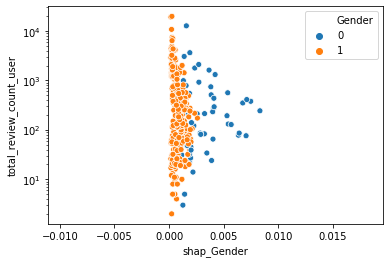

In [79]:
ax = sns.scatterplot(data = special_shap_df,
                     x = 'shap_Gender',
                     y = 'total_review_count_user',
                     hue = 'Gender')

ax.set(yscale="log")

In [80]:
# f = plt.figure(figsize=(6, 6))
# gs = f.add_gridspec(1, 1)

# with sns.axes_style("ticks"):
#     ax = f.add_subplot(gs[0, 0])
#     gs = sns.FacetGrid(data = special_shap_df,
#                   col="Gender",
#                   height = 5,
#                   aspect = 1,
#                  )

#     gs = (gs.map(plt.scatter, "shap_Gender", "total_review_count_user", edgecolor="w")
#       .add_legend())
    
#     gs.set(yscale="log")

ValueError: too many values to unpack (expected 2)

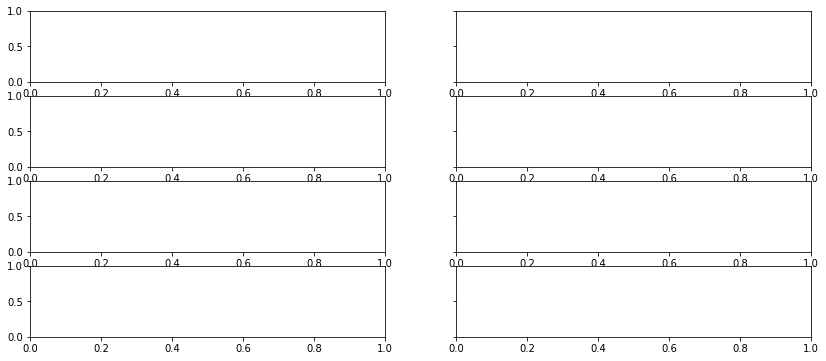

In [81]:
fig, axes =plt.subplots(nrows= 4, ncols = 2, figsize=(14, 6) , sharey= True)
ax1 , ax2 = axes.flatten()

In [82]:
# special_shap_df['Gender']  = special_shap_df['Gender'].map({ 0 :'Female', 1 : 'Male'})

In [83]:
special_shap_df

,shap_total_review_count_user,shap_total_review_count_critic,shap_average_rating_value,shap_total_gross_value,shap_Gender,total_review_count_user,total_review_count_critic,average_rating_value,total_gross_value,Gender
0,0.063972,0.053216,0.002377,0.069334,0.000314,1638,864,6.30,334518093.0,1
1,0.074574,0.039628,0.025537,0.045205,0.001061,244,88,7.70,111866.0,1
2,0.077426,0.057007,0.037334,0.045298,0.001377,1426,533,5.93,149659264.0,1
3,0.106435,0.093164,0.011972,0.049891,0.000554,16,35,5.75,22189.0,1
4,0.057516,0.033329,0.030849,0.023529,0.001402,132,154,5.20,25799043.0,1
...,...,...,...,...,...,...,...,...,...,...
326,0.058590,0.066874,0.006000,0.045833,0.006424,86,77,6.80,352786.0,0
327,0.070025,0.080322,0.018502,0.029371,0.000877,183,50,5.50,3071947.0,1
328,0.078582,0.041685,0.003682,0.035137,0.000727,1056,317,6.85,59591197.0,1
329,0.076609,0.035571,0.032559,0.046648,0.000906,70,109,8.00,198809.0,1


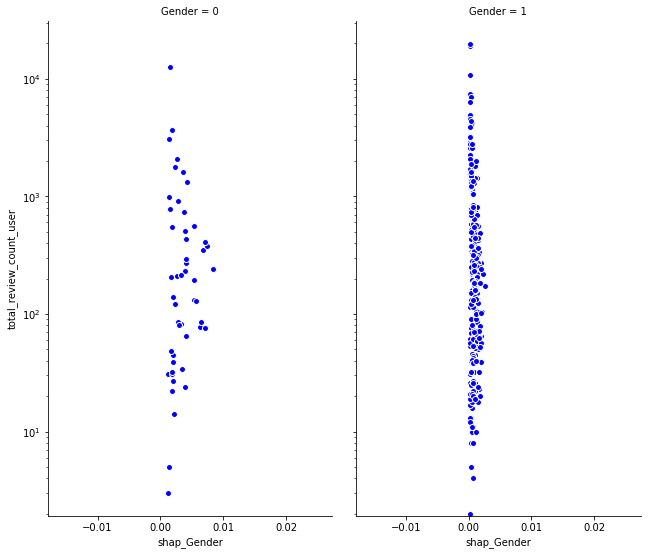

In [84]:
g = sns.FacetGrid(data = special_shap_df ,
                  col="Gender",
                 )

g = (g.map(plt.scatter, "shap_Gender", "total_review_count_user", edgecolor="w",color='blue')
      .add_legend())

g.set(yscale="log")
g.fig.set_size_inches(10,10)

# g.axes[0,0].set_xlabel('Gender SHAP values', fontsize=14)
# g.axes[0,0].set_ylabel('Review Count User', fontsize=16)
# g.axes[0,1].set_xlabel('Gender SHAP values', fontsize=14)
# g.axes[0,0].set_title('Female', fontsize=16)
# g.axes[0,1].set_title('Male', fontsize=16)

In [87]:
dir(ax)[390:400]

['set_ylabel',
 'set_ylim',
 'set_ymargin',
 'set_yscale',
 'set_yticklabels',
 'set_yticks',
 'set_zorder',
 'specgram',
 'spines',
 'spy']

In [ ]:
g = sns.FacetGrid(data = special_shap_df,
                  col="Gender",
                  height = 5,
                  aspect = 1,
                 )

g = (g.map(plt.scatter, "shap_Gender", "total_review_count_user", edgecolor="w")
      .add_legend())

g.set(yscale="log")

# g.ax[0][0].set_xlabels('Hello')
# plt.xlabel('Machine learning Model', fontsize=16)
# plt.ylabel('Accuracy of the model', fontsize=16)

g = sns.FacetGrid(data = special_shap_df ,
                  col="Gender",
                  height = 5,
                  aspect = 1,
                 )

g = (g.map(plt.scatter, "shap_Gender", "total_review_count_critic", edgecolor="w")
      .add_legend())

g.set(yscale="log")

g = sns.FacetGrid(data = special_shap_df ,
                  col="Gender",
                  height = 5,
                  aspect = 1,
                 )

g = (g.map(plt.scatter, "shap_Gender", "average_rating_value", edgecolor="w")
      .add_legend())

g.set(yscale="log")

g = sns.FacetGrid(data = special_shap_df ,
                  col="Gender",
                  height = 5,
                  aspect = 1,
                 )

g = (g.map(plt.scatter, "shap_Gender", "total_gross_value", edgecolor="w")
      .add_legend())

g.set(yscale="log")

plt.savefig('SHAP_Alternative_dependence.png', dpi=100 , bbox_inches='tight')


In [ ]:
# g = sns.FacetGrid(data = special_shap_df ,
#                   col="Gender"
#                  )

# g = (g.map(plt.scatter, "shap_total_review_count_user", "total_review_count_user", edgecolor="w")
#       .add_legend())

# g.set(yscale="log")

# g = sns.FacetGrid(data = special_shap_df ,
#                   col="Gender"
#                  )

# g = (g.map(plt.scatter, "shap_total_review_count_user", "total_review_count_critic", edgecolor="w")
#       .add_legend())

# g.set(yscale="log")

# g = sns.FacetGrid(data = special_shap_df ,
#                   col="Gender"
#                  )

# g = (g.map(plt.scatter, "shap_total_review_count_user", "average_rating_value", edgecolor="w")
#       .add_legend())

# g.set(yscale="log")

# g = sns.FacetGrid(data = special_shap_df ,
#                   col="Gender"
#                  )

# g = (g.map(plt.scatter, "shap_total_review_count_user", "total_gross_value", edgecolor="w")
#       .add_legend())

# g.set(yscale="log")

In [ ]:
ax = sns.scatterplot(data = special_shap_df,
                     x = 'shap_Gender',
                     y = 'total_review_count_critic',
                     hue = 'Gender')

ax.set(yscale="log")

In [ ]:
ax = sns.scatterplot(data = special_shap_df,
                     x = 'shap_Gender',
                     y = 'average_rating_value',
                     hue = 'Gender')

ax.set(yscale="log")

In [ ]:
ax = sns.scatterplot(data = special_shap_df,
                     x = 'shap_Gender',
                     y = 'total_gross_value',
                     hue = 'Gender')

ax.set(yscale="log")

In [ ]:
bin_means, bin_edges, binnumber = stats.binned_statistic(x, x_pdf, statistic='mean', bins=25)

In [ ]:
values = [1.0, 1.0, 2.0, 1.5, 3.0]

In [ ]:
stats.binned_statistic([1, 1, 2, 5, 7], values, 'sum', bins=2)

In [ ]:
bin_means, bin_edges, binnumber = stats.binned_statistic(special_shap_df['total_review_count_user'],special_shap_df['shap_total_review_count_user'],'mean',bins = 10)

In [ ]:
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

In [ ]:
plt.figure()
# plt.hist(samples, bins=50, density=True, histtype='stepfilled',
#          alpha=0.2, label='histogram of data')
# plt.plot(special_shap_df['total_review_count_user'],special_shap_df['shap_total_review_count_user'], 'r-', label='analytical pdf')
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=2,
           label='binned statistic of data')
plt.plot((binnumber - 0.5) * bin_width, special_shap_df['shap_total_review_count_user'], 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# g = sns.FacetGrid(special_shap_df[['total_review_count_user','shap_total_review_count_user','Gender']], hue="time",  row="Gender")

In [ ]:
shap.summary_plot(shap_values[0], X_test,show=False,plot_type="layered_violin")

### Choose data point and explain the model on that data point

In [ ]:
X_test

In [ ]:
y_test.loc[751]

In [ ]:
choosen_instance = X_test.loc[[751]]
choosen_instance

In [ ]:
rnd_forest.classes_

In [ ]:
idx =  751

instance = X_test.loc[idx][None, :]

pred = rnd_forest.predict(instance)
scores =  rnd_forest.predict_proba(instance)
class_idx = pred.item()

print("The predicted class for the X_test [{}] is {}.".format(idx, *pred))
print("OVR decision function values are {}.".format(*scores))

In [ ]:
# choosen_instance = X_test.loc[[583]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()


shap.force_plot(explainer.expected_value[2], shap_values[2], choosen_instance,matplotlib=True)

In [ ]:
test = [0,1,2,3]

In [ ]:
shap.initjs()
for i in test:
#     shap.decision_plot(expected_value, sh[i], X_display.loc[T.index[i]], feature_order=r.feature_idx, xlim=r.xlim)
    shap.force_plot(explainer.expected_value[i],
                    shap_values[i],
                    choosen_instance,
                    matplotlib = True,
                    out_names = rnd_forest.classes_[i]
                   )
    shap.plots.force.visualize
# plt.savefig("SHAP_ForcePlot_RF_EntireDirector_Unbalanced_WithGender_ExcellentDataPoint.png",bbox_inches = 'tight')

In [ ]:
shap.initjs()
shap.save_html('hello.html',shap.force_plot(explainer.expected_value[3],
                    shap_values[3],
                    choosen_instance,
#                     matplotlib = True,
#                     show= False,
                    out_names = rnd_forest.classes_[3]
                   ))
plt.show()
# plt.savefig("Data2_FORCE_plot_Class_Average.png",bbox_inches = 'tight')

In [ ]:
shap.force_plot(
    explainer.expected_value[2],
    shap_values[2] ,
    instance,
    feature_names,
)

In [ ]:
shap.force_plot(
    explainer.expected_value[1],
    shap_values[1] ,
    instance,
    feature_names,
)

In [ ]:
def class_labels(classifier, instance, class_names=None):
    """
    Creates a set of legend labels based on the decision
    scores of a classifier and, optionally, the class names.
    """

    decision_scores = classifier.predict_proba(instance)

    if not class_names:
        class_names = ['Class {}'.format(i) for i in range(decision_scores.shape[1])]

    for i, score in enumerate(np.nditer(decision_scores)):
        class_names[i] = class_names[i] + ' ({})'.format(round(score.item(),3))

    return class_names

In [ ]:
legend_labels = class_labels(rnd_forest, instance, ['Average', 'Excellent', 'Poor', 'Terrible'])
legend_labels

In [ ]:
shap_values[0]

In [ ]:
r = shap.multioutput_decision_plot(explainer.expected_value.tolist(),
                                   shap_values,
                                   0,
                                   feature_names=list(feature_names),
                                   feature_order='importance',
                                   highlight=[2],
                                   legend_labels=legend_labels,
                                   return_objects=True,
                                   legend_location='lower right',
                                  show=False)

plt.title('SHAP multi-output decision plot',fontsize = 16, y = 1.05)
plt.xlabel('Random Forest output value')
# plt.savefig("SHAP_MultiOutput_Decision_plot_RF_EntireDirector_Unbalanced_WithGender.png",bbox_inches = 'tight')

## Dependence plot

In [ ]:
# Example Shap dependence plot

# import xgboost
# import shap

# # train XGBoost model
# X,y = shap.datasets.adult()
# model = xgboost.XGBClassifier().fit(X, y)

# # compute SHAP values
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X)

# shap.dependence_plot(0, shap_values, X)

In [ ]:
rnd_forest

In [ ]:
explainer = shap.TreeExplainer(rnd_forest)
shap_values = explainer.shap_values(X_test)

In [ ]:
explainer.expected_value

In [ ]:
plt.plot(shap_values[0],X_test['total_review_count_user'].to_numpy())

In [ ]:
sns.distplot(shap_values[0])

In [ ]:
X_test

In [ ]:
shap_values[0] -----> Average

In [ ]:
shap_values[1] -----> Excellent

In [ ]:
shap_values[2] -----> Poor

In [ ]:
shap_values[3] -----> Terrible

In [ ]:
shap_values[0][0] ------> Row 1 of Average

In [ ]:
shap_values[0][0][0] ------> Row 1 and feature 1 of Average

In [ ]:
for i,num in enumerate(shap_values[1]):
    print(i)
    print(num)

In [ ]:
X_test[['total_review_count_user']]

In [ ]:
total_review_shap = 0
for i,num in enumerate(shap_values[1]):
    total_review_shap = shap_values[1][i]

In [ ]:
shap_values[0][0][0], shap_values[1][0][0], shap_values[2][0][0] , shap_values[3][0][0]

In [ ]:
shap_values[0][0][0] + shap_values[1][0][0] + shap_values[2][0][0] + shap_values[3][0][0]

In [ ]:
# trial_x = shap_values[1] + shap_values[2] + shap_values[3] + shap_values[0]
# x_trial = pd.DataFrame(data =trial_x )

In [ ]:
sns.distplot(shap_values[0]+shap_values[1]+shap_values[2] + shap_values[3])

## Dependence Plot

In [ ]:
X_test['total_review_count_user']

In [ ]:
shap.dependence_plot("total_review_count_user", shap_values[0], X_test, interaction_index="Gender", dot_size=3) 

In [ ]:
fig, axes = plt.subplots(nrows= 2 , ncols=2, figsize=(14, 6))
ax1 , ax2 , ax3 , ax4 = axes.flatten()

shap.dependence_plot("total_review_count_critic", shap_values[0], X_test, interaction_index="Gender",ax = ax1,show = False) 
shap.dependence_plot("total_review_count_user", shap_values[0], X_test, interaction_index="Gender" , ax = ax2, show = False) 
shap.dependence_plot("average_rating_value", shap_values[0], X_test, interaction_index="Gender",ax = ax3,show = False) 
shap.dependence_plot("total_gross_value", shap_values[0], X_test, interaction_index="Gender" , ax = ax4, show = False) 

fig.suptitle('SHAP Dependence plot', y = 1.30 , x = 0.45 , fontsize = 16)
plt.subplots_adjust(top=1.2, bottom=0.1, left=0.10, right=0.85, hspace=0.2,
                    wspace=0.4)
# fig.savefig('SHAP Dependence plot_RF_EntireData_WithGender.png', dpi=100 , bbox_inches='tight')


In [ ]:
shap.dependence_plot("Gender", shap_values[0], X_test, interaction_index="total_review_count_user") 

In [ ]:
fig, axes = plt.subplots(nrows= 2 , ncols=2, figsize=(14, 6))
ax1 , ax2 , ax3 , ax4 = axes.flatten()

shap.dependence_plot("Gender", shap_values[0], X_test, interaction_index="total_review_count_critic",ax = ax1,show = False) 
shap.dependence_plot("Gender", shap_values[0], X_test, interaction_index="total_review_count_user" , ax = ax2, show = False) 
shap.dependence_plot("Gender", shap_values[0], X_test, interaction_index="average_rating_value",ax = ax3,show = False) 
shap.dependence_plot("Gender", shap_values[0], X_test, interaction_index="total_gross_value" , ax = ax4, show = False) 

fig.suptitle('SHAP Dependence plot', y = 1.30 , x = 0.45 , fontsize = 16)
plt.subplots_adjust(top=1.2, bottom=0.1, left=0.10, right=0.85, hspace=0.2,
                    wspace=0.4)
# fig.savefig('SHAP Dependence plot_RF_EntireData_WithGender.png', dpi=100 , bbox_inches='tight')


In [ ]:
fig, axes = plt.subplots(nrows= 2 , ncols=2, figsize=(14, 6))
ax1 , ax2 , ax3 , ax4 = axes.flatten()

shap.dependence_plot("Gender", shap_values[1], X_test, interaction_index="total_review_count_critic",ax = ax1,show = False) 
shap.dependence_plot("Gender", shap_values[1], X_test, interaction_index="total_review_count_user" , ax = ax2, show = False) 
shap.dependence_plot("Gender", shap_values[1], X_test, interaction_index="average_rating_value",ax = ax3,show = False) 
shap.dependence_plot("Gender", shap_values[1], X_test, interaction_index="total_gross_value" , ax = ax4, show = False) 

fig.suptitle('SHAP Dependence plot', y = 1.30 , x = 0.45 , fontsize = 16)
plt.subplots_adjust(top=1.2, bottom=0.1, left=0.10, right=0.85, hspace=0.2,
                    wspace=0.4)
# fig.savefig('SHAP Dependence plot_RF_EntireData_WithGender.png', dpi=100 , bbox_inches='tight')


In [ ]:
shap_values[1]

In [ ]:
break

### Unbalanced Without Gender

In [ ]:
data2 = data.copy()


data2.drop(columns =['Gender_MALE','Gender_FEMALE'],inplace=True)

In [ ]:
data2.shape

In [ ]:
score2, rnd_forest2,X2, y2 ,X_train2, X_test2, y_train2, y_test2 = report_accuracy_RF(data2,"Movie_class")
print_accuracy_feature_importance(score2,X2, rnd_forest2)
# print("===============================================\n")
# print()
# cnf_matrix2 = create_cnf_matrix(y_test2,X_test2,rnd_forest2)
# print(cnf_matrix2)
# print("===============================================\n")
# TN2, FP2, FN2, TP2 = calculate_confusion_matrix_metrics(cnf_matrix2)
# print('TN = ',TN2)
# print('FP = ',FP2)
# print('FN = ',FN2)
# print('TP = ',TP2)

In [ ]:

y_predict2= rnd_forest2.predict(X_test2)

cnf_matrix = confusion_matrix(y_test2, y_predict2,labels=['Terrible','Poor','Average','Excellent'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Terrible','Poor','Average','Excellent'],
                      title='Confusion matrix, without normalization')

In [ ]:



print(classification_report(y_test2,y_predict2,labels=['Terrible','Poor','Average','Excellent']))

In [ ]:
from sklearn.metrics import roc_auc_score


y_prob2 = rnd_forest2.predict_proba(X_test2)
ovo_macro_roc_auc2 = roc_auc_score(y_test2, y_prob2, average="macro", multi_class = "ovo")
print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(ovo_macro_roc_auc2,3))

In [ ]:
rnd_forest2

In [ ]:
customized_classification_report(y_test2,y_predict2, ovo_macro_roc_auc2)

### Balanced on Gender

In [ ]:
data3 = pd.read_csv(file_location)

In [ ]:
def balance_gender(dataframe):
    female_list_unique_directors = dataframe[(dataframe['Gender'] == 'Female')].director_ids.unique().tolist()
    
    unique_male_directors = dataframe[(dataframe['Gender'] == 'Male')].director_ids.unique().tolist()
    
    male_list_unique_directors = list(np.random.choice(unique_male_directors, replace = False, size = len(female_list_unique_directors)))
    
    total_list_unique_directors = female_list_unique_directors + male_list_unique_directors

    dataframe = dataframe[dataframe['director_ids'].isin(total_list_unique_directors)]

    return dataframe

In [ ]:
data3.Gender.value_counts()

In [ ]:
balanced_data = balance_gender(data3)

if data_1_2_3 == 1:
    
    balanced_data=  balanced_data.drop(columns=['director_ids', 'director_name','primaryProfession', 'knownForTitles'])
    
elif data_1_2_3 == 2 or data_1_2_3 ==3:
    balanced_data = balanced_data.drop(columns=['director_ids', 'director_name'])



In [ ]:
balanced_data.shape

In [ ]:
balanced_data.Gender.value_counts()

In [ ]:
q1,q2,q3,q4 = quantile_feature(balanced_data,feature)
balanced_data = create_Movie_class(balanced_data,feature)

balanced_data['Gender_MALE'] = balanced_data.Gender.apply(dummy_male)
balanced_data['Gender_FEMALE'] = balanced_data.Gender.apply(dummy_female)


balanced_data = balanced_data.drop(columns=[feature,'Gender'])

In [ ]:
balanced_data['Movie_class'].value_counts()

In [ ]:
balanced_data

In [ ]:
score3, rnd_forest3,X3, y3 ,X_train3, X_test3, y_train3, y_test3 = report_accuracy_RF(balanced_data,"Movie_class")

print(f"The accuracy of the model is {score3}.")
print()
print(f'The input features included are {X3.columns} ')
print()
print(f'The corresponding feature importance is{rnd_forest3.feature_importances_}')

In [ ]:
# y_true3 = y_test3.copy()
y_predict3 = rnd_forest3.predict(X_test3)


from sklearn.metrics import classification_report


print(classification_report(y_test3,y_predict3,labels=['Terrible','Poor','Average','Excellent']))

In [ ]:
y_prob3 = rnd_forest3.predict_proba(X_test3)
ovo_macro_roc_auc3 = roc_auc_score(y_test3, y_prob3, average="macro", multi_class = "ovo")
print( "\nArea Under the Curve - ROC (OVO , Macro) : ",round(ovo_macro_roc_auc3,2))

In [ ]:
rnd_forest3

In [ ]:
customized_classification_report(y_test3,y_predict3, ovo_macro_roc_auc3)

### SHAP

In [ ]:
import shap
shap.initjs()


# explainer = shap.TreeExplainer(rnd_fores)
explainer = shap.TreeExplainer(rnd_forest)
shap_values = explainer.shap_values(X_test)